# Fashion MNIST

## Importing the Libraries 

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

## Importing the Data

In [2]:
datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = datagen.flow_from_directory('Dataset/Training_Set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = datagen.flow_from_directory('Dataset/Test_Set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 54 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


## Building the ANN Model

In [3]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

## Compiling the ANN Model

In [4]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

## Training the ANN

In [5]:
history=model.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
2/2 [==============================] - 8s 5s/step - loss: 1.3549 - accuracy: 0.5370 - val_loss: 0.5171 - val_accuracy: 0.8000
Epoch 2/25
2/2 [==============================] - 8s 4s/step - loss: 0.3707 - accuracy: 0.8519 - val_loss: 0.6072 - val_accuracy: 0.8000
Epoch 3/25
2/2 [==============================] - 5s 2s/step - loss: 0.3536 - accuracy: 0.8704 - val_loss: 0.5161 - val_accuracy: 0.8000
Epoch 4/25
2/2 [==============================] - 8s 7s/step - loss: 0.2928 - accuracy: 0.8519 - val_loss: 0.4560 - val_accuracy: 0.8000
Epoch 5/25
2/2 [==============================] - 5s 3s/step - loss: 0.4015 - accuracy: 0.8333 - val_loss: 0.6659 - val_accuracy: 0.8000
Epoch 6/25
2/2 [==============================] - 9s 6s/step - loss: 0.4603 - accuracy: 0.8519 - val_loss: 0.5190 - val_accuracy: 0.9333
Epoch 7/25
2/2 [==============================] - 4s 3s/step - loss: 0.2678 - accuracy: 0.8519 - val_loss: 0.7600 - val_accuracy: 0.4000
Epoch 8/25
2/2 [=========================

## Plotting the Accuracy and Loss

<function matplotlib.pyplot.show(close=None, block=None)>

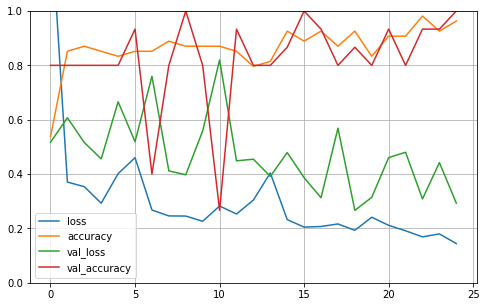

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Performance=pd.DataFrame(history.history)

Performance.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

## Use the Model to Predict

In [7]:
from keras.preprocessing import image

prediction_image = image.load_img('Dataset/Single_Prediction/Print_1.jpg', target_size=(64, 64))
prediction_image = image.img_to_array(prediction_image)
prediction_image = np.expand_dims(prediction_image, axis=0)

result = model.predict(prediction_image)

if result[0][0] == 0:
    prediction = 'Part is OK.'
else:
    prediction = 'Part is defective!'
print(prediction)

Part is defective!


In [8]:
from keras.preprocessing import image

prediction_image = image.load_img('Dataset/Single_Prediction2/Print_1.jpg', target_size=(64, 64))
prediction_image = image.img_to_array(prediction_image)
prediction_image = np.expand_dims(prediction_image, axis=0)

result = model.predict(prediction_image)

if result[0][0] == 0:
    prediction = 'Part is OK.'
else:
    prediction = 'Part is defective!'
print(prediction)

Part is OK.


In [9]:
from keras.preprocessing import image

prediction_image = image.load_img('Dataset/Single_Prediction3/Print_1.jpg', target_size=(64, 64))
prediction_image = image.img_to_array(prediction_image)
prediction_image = np.expand_dims(prediction_image, axis=0)

result = model.predict(prediction_image)

if result[0][0] == 0:
    prediction = 'Part is OK.'
else:
    prediction = 'Part is defective!'
print(prediction)

Part is OK.
